## mse

mse:

$h = c_{p}T + gz + L_{v}q$

<br />
development of spatial variance of mass weighted vertically integrated mse:

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \text{forcing correlation terms}$

$h ^ \prime$ - moist static energy anomaly from the domain mean \
$\delta t$ - one day


In [1]:
import xarray as xr

import numpy as np
import skimage.measure as skm

import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
folder = '/Users/cbla0002/Documents/data/cmip6/' + model

In [3]:
fileName = model + '_mse_example_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds_example = xr.open_dataset(path)

In [4]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()


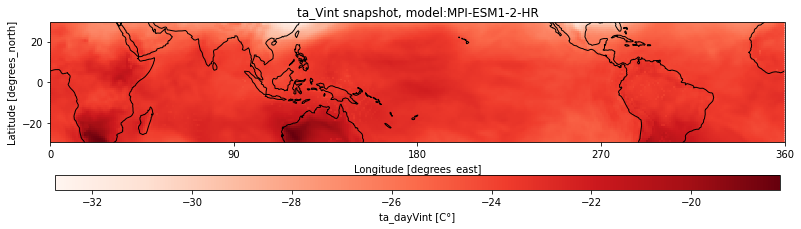

In [5]:
plot_snapshot(ds_example.ta_dayVint, 'Reds', 'ta_Vint', model)

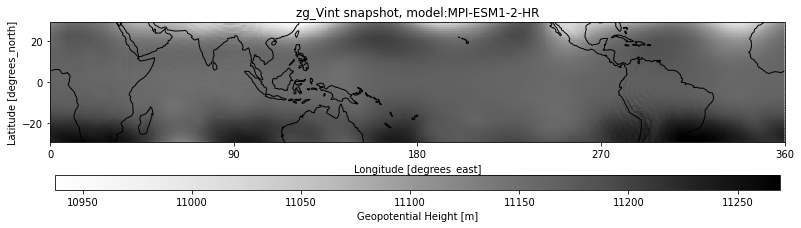

In [6]:
plot_snapshot(ds_example.zg_dayVint, 'Greys', 'zg_Vint', model)

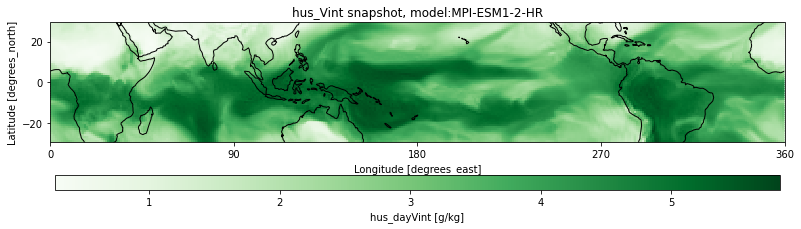

In [7]:
plot_snapshot(ds_example.hus_dayVint, 'Greens', 'hus_Vint', model)

In [8]:
fileName = model + '_mse_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (time: 4, plev: 8, lat: 64, lon: 384)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Data variables:
    ta_day   (time, plev, lat, lon) float32 ...
    zg_day   (time, plev, lat, lon) float32 ...
    hus_day  (time, plev, lat, lon) float32 ...

In [9]:
ds.ta_day

<xarray.DataArray 'ta_day' (time: 4, plev: 8, lat: 64, lon: 384)>
[786432 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    C°

In [10]:
ds.zg_day

<xarray.DataArray 'zg_day' (time: 4, plev: 8, lat: 64, lon: 384)>
[786432 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  geopotential_height
    long_name:      Geopotential Height
    comment:        Geopotential is the sum of the specific gravitational pot...
    units:          m
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:13Z altered by CMOR: Reordered dimension...

In [11]:
ds.hus_day

<xarray.DataArray 'hus_day' (time: 4, plev: 8, lat: 64, lon: 384)>
[786432 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    g/kg

In [12]:
T = ds.ta_day.isel(time=0)
gz = ds.zg_day.isel(time=0)
q = ds.hus_day.isel(time=0)

In [13]:
c_p = 1.005
L_v = 2.256e6
mse = (c_p*T + gz + L_v*q).mean(dim='plev', keep_attrs=True)

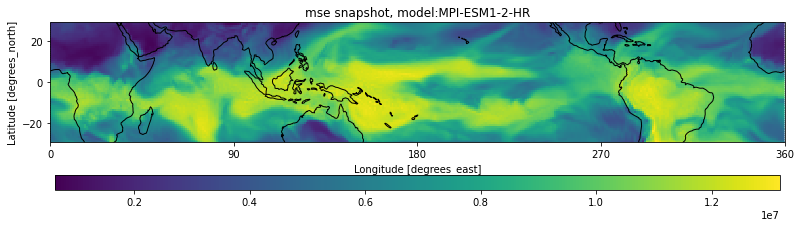

In [14]:
plot_snapshot(mse, 'viridis', 'mse', model)

In [15]:
mse_mean = (c_p*T + gz + L_v*q).mean(dim='plev', keep_attrs=True).mean(dim=('lat','lon'))

In [16]:
mse_anom = mse - mse_mean

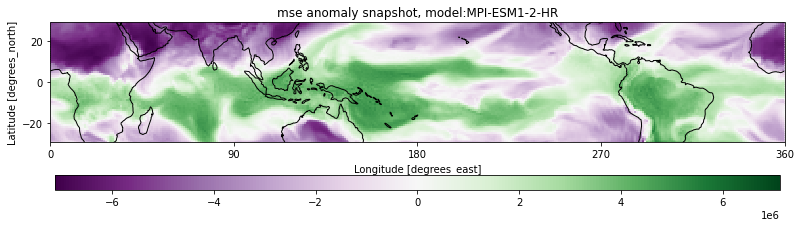

In [17]:
plot_snapshot(mse_anom, 'PRGn', 'mse anomaly', model)

In [18]:
mse_var = (mse - mse_mean)**2

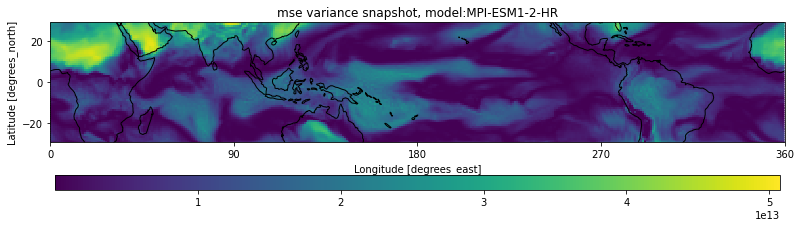

In [19]:
plot_snapshot(mse_var, 'viridis', 'mse variance', model)

In [20]:
T2 = ds.ta_day.isel(time=1)
gz2 = ds.zg_day.isel(time=1)
q2 = ds.hus_day.isel(time=1)

mse2 = (c_p*T2 + gz2 + L_v*q2).mean(dim='plev', keep_attrs=True)
mse2_mean = (c_p*T2 + gz2 + L_v*q2).mean(dim='plev', keep_attrs=True).mean(dim=('lat','lon'))
mse2_anom = mse2 - mse2_mean
mse2_var = mse2_anom**2

dmse = mse2_var - mse_var

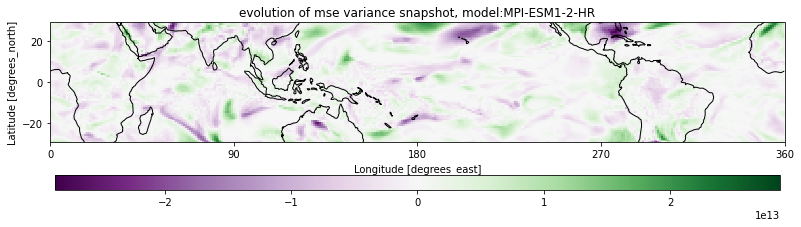

In [21]:
plot_snapshot(dmse, 'PRGn', 'evolution of mse variance', model)